###  Setup

Needed to do some setup for running pandas and numpy

- Did an apt-get install for python3-venv
- Created a virtual environment directory and activated it using the instructions here: https://docs.python.org/3/library/venv.html
- After activation, installed pip and used pip to install pandas and numpy
- Also installed jupyter notebook and ran the notebook under the activated virtual env
- Also installed matplotlib using pip

In [1]:
import pandas
import numpy
# no error

###  Chapter 2  - Intro (Old Edition)

In [2]:
# getting top 10 time zones from a dataset using classic python

from collections import defaultdict
import json
import heapq

tz_dict = defaultdict(int)
with open("/home/rushi/dev/data/pda/ch02/usagov_bitly_data2012-03-16-1331923249.txt", "r") as f:
    for line in f.readlines():
        data = json.loads(line)
        if 'tz' in data.keys():
            tz_dict[data['tz']] += 1

results = heapq.nlargest(10, tz_dict.items(), key=lambda x: x[1])
for result in results:
    print(result)


('America/New_York', 1251)
('', 521)
('America/Chicago', 400)
('America/Los_Angeles', 382)
('America/Denver', 191)
('Europe/London', 74)
('Asia/Tokyo', 37)
('Pacific/Honolulu', 36)
('Europe/Madrid', 35)
('America/Sao_Paulo', 33)


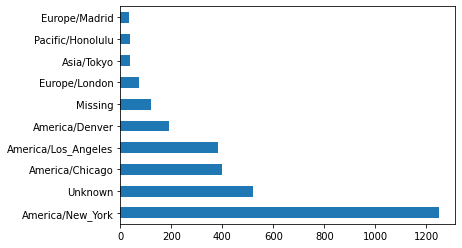

In [3]:
# pandas approach
import json

from pandas import DataFrame, Series
import pandas as pd

records = []
with open("/home/rushi/dev/data/pda/ch02/usagov_bitly_data2012-03-16-1331923249.txt", "r") as f:
    for line in f.readlines():
        records.append(json.loads(line))
        
frame = DataFrame(records)
frame['tz'].value_counts()[:10]

# since the second most tz is unknown, clean up the data a little
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()[:10]
#print(tz_counts[:10])

tz_counts.plot(kind='barh', rot=0)



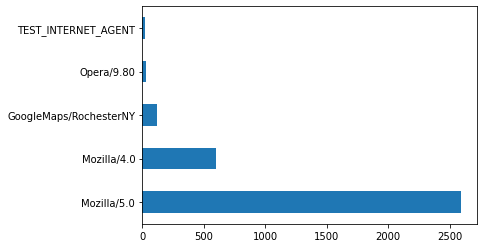

In [4]:

# getting agent strings
results = Series([x.split()[0] for x in frame.a.dropna()])
results.value_counts()[:5].plot(kind='barh', rot=0)

In [5]:
import numpy as np
cframe = frame[frame.a.notnull()]
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'NotWindows')
print(operating_system[:5])

group_by_tz_os = cframe.groupby(['tz', operating_system])

# recreate a table view
agg_counts = group_by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

['Windows' 'NotWindows' 'Windows' 'NotWindows' 'Windows']


,NotWindows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [6]:
# sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:10]


tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [7]:

# pick the 10 rows with top count
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,NotWindows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


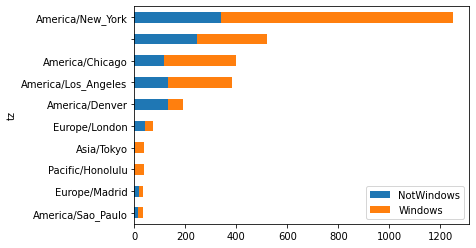

In [8]:
count_subset.plot(kind='barh', stacked=True)

In [9]:
import pandas as pd
import os

data_path = '/home/rushi/dev/data/pda/ch02/'
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(os.path.join(data_path, 'movielens/users.dat'), sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(os.path.join(data_path, 'movielens/ratings.dat'), sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table(os.path.join(data_path, 'movielens/movies.dat'), sep='::', header=None, names=mnames, engine='python')

print(users[:5])

   user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455


In [10]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [12]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [13]:
#mean_ratings = data.pivot_table('rating', rows='title', cols='gender', aggfunc='mean')
#mean_ratings[:5]

### Chapter 1-2-3 (Edition 2) are introductory for pure python and so are skipped

###  Chapter 4 - Numpy 

In [14]:
import numpy as np

my_arr = np.arange(1000000)
my_list = list(range(1000000))

# IMPORTANT: The %time tag only applies to a single line
# putting it on a preceding line will make it look as though 
# no time is taken for the call

%time for _ in range(10): my_arr2 = my_arr * 3
%time for _ in range(10): my_list2 = my_list * 3

CPU times: user 17.4 ms, sys: 164 µs, total: 17.6 ms
Wall time: 17.5 ms
CPU times: user 409 ms, sys: 0 ns, total: 409 ms
Wall time: 407 ms


In [15]:
import numpy as np
data = np.random.randn(2,3) # shape of the output is 2X3
#help(np.random.randn)
print(data)
print(data + data)
print(data * 10)
print(data * data)

# numpy arrays are homogenous
print(data.shape)
print(data.dtype)

[[-1.27966037  0.3993922   0.44558504]
 [-0.73577411  0.99950846 -0.76137713]]
[[-2.55932074  0.79878441  0.89117008]
 [-1.47154821  1.99901693 -1.52275425]]
[[-12.79660369   3.99392204   4.45585042]
 [ -7.35774106   9.99508464  -7.61377126]]
[[1.63753066 0.15951413 0.19854603]
 [0.54136353 0.99901717 0.57969513]]
(2, 3)
float64


In [16]:

my_list = [1,2,3,4]
np_list = np.array(my_list)
print(np_list)
print(np_list.ndim) # dimensionality - 1
print(np_list.shape) # 4 columns each of them has a scalar (4,)

print("=========")

my_inner_list = [[1,2,3],[4,5,6],[7,8,9]]
np_list = np.array(my_inner_list)
print(np_list)
print(np_list.ndim) # dimensionality - 2 (list of lists)
print(np_list.shape) # 3 columns, each a list of 3 (3,3)

print("=========")

my_inner_list = [[1,2,3],[4,5,6],[7,8,9, 10]]
np_list = np.array(my_inner_list)
print(np_list)
print(np_list.ndim) # dimensionality - 1 since non homogenous sizes
print(np_list.shape) # Non homogenous list size. 3 columns (3,)

print("=========")

my_inner_list = [[[1,1,1],[2,2,2],[3,3,3]],
                 [[4,4,4],[5,5,5],[6,6,6]],
                 [[7,7,7],[8,8,8],[9,9,9]]]
np_list = np.array(my_inner_list)
print(np_list)
print(np_list.ndim) # dimensionality - 3. List of list of list
print(np_list.shape) # 3 columns, each a list with 3 columns, each with 3 column (3,3,3)



[1 2 3 4]
1
(4,)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
2
(3, 3)
[list([1, 2, 3]) list([4, 5, 6]) list([7, 8, 9, 10])]
1
(3,)
[[[1 1 1]
  [2 2 2]
  [3 3 3]]

 [[4 4 4]
  [5 5 5]
  [6 6 6]]

 [[7 7 7]
  [8 8 8]
  [9 9 9]]]
3
(3, 3, 3)


In [17]:
print(np.zeros(10))
print(np.zeros((3,3,3))) # 3 dimensional array
print(np.zeros((2,2,2,2))) # 3 dimensional array

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[[0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]]]


Visualzing dimensions - initial attempt

- 0 dimension. A single value with no metadata. Ex: 19
- 1 dimension. List of values. 1 metadata variable: size. Ex: [1,2,3,4]. Size: 4
- 2 dimension. Matrix of values. Can grow horizontally or vertically. Imagine a sheet of paper which can grow horizontally or verically. Metadata: x-size and y-size Eg: Matrix with m,n row, column values to indicate size
- 3 dimension. Multiple sheets of paper layered on one other. Extra metadata value to represent number of sheets. 3 sheets of paper. each paper length 1m and height 2m can be represented as 1,2,3
- 4 dimension. Multiple stacks of sheets of paper. Extra metadata value represents the number of such stacks. Ex: 4 stacks of paper. Each stack with 5 sheets of paper and each paper has height 2m and widhth 3 me : (3,2,5,4) : (height, width, numsheets, numstacks)
- 5 dims : multiple boxes. each box contains multiple stacks of paper. extra variable indicates the number of such boxes
- 6 dims: container with boxes representing 5 dims.
- 7 dims: boats with container
- 8 dims: fleet with boats


In [18]:
# array creation methods

print(np.zeros(4))
print(np.zeros((2,2)))
print(np.ones((2,2)))
print(np.empty(3)) # unintialized
print(np.arange(4))

my_list = [[1,2],[3,4]]
my_np = np.array(my_list) # copies data into np.array
print(my_np)

my_np_2 = np.asarray(my_list) # does a copy
my_np_2 = np.asarray(my_np) # does not do a copy

my_ones = np.ones_like(my_np_2) # create ones with same shape
print(my_np_2.shape)
print(my_ones.shape)

# use shape fill with value
my_fullof9s = np.full_like(my_ones , 9)
print(my_fullof9s)

# similarly
print(np.zeros_like(my_ones))
print(np.empty_like(my_ones))

# identity (0s on the diagonal)
# always creates an N*N matrix
print(np.eye(3))
print(np.identity(3))

[0. 0. 0. 0.]
[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]
[6.9361587e-310 6.9361587e-310 6.9361587e-310]
[0 1 2 3]
[[1 2]
 [3 4]]
(2, 2)
(2, 2)
[[9 9]
 [9 9]]
[[0 0]
 [0 0]]
[[0 0]
 [0 0]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [19]:
# data types
int_arr = np.array([1,2,3,4])
print(int_arr.dtype)

# cast to a different type (always copies)
float_arr = int_arr.astype(np.float64)
print(float_arr.dtype)

# downcasting works - be careful
floats = [1.2,3.4]
print(np.array(floats).astype(np.int32)) # will give truncated values

int64
float64
[1 3]


In [20]:
arr = np.array([[1,2,3], [4,5,6]])

print(arr + arr)
print(arr == arr) # returns booleans with same shape
print(arr * arr)

print(arr * 3) # scalars apply to all elements
print(arr ** 2) # scalars apply to all elements
print(1/arr) # scalars apply to all elements

# operations between differently sizes arrays 
# termed 'broadcasting' seems to be an advanced topic

diff_arr = np.array([[1,2,3], [4,5,6], [7,8,9]])

print(arr + diff_arr[0:2]) # this works !

[[ 2  4  6]
 [ 8 10 12]]
[[ True  True  True]
 [ True  True  True]]
[[ 1  4  9]
 [16 25 36]]
[[ 3  6  9]
 [12 15 18]]
[[ 1  4  9]
 [16 25 36]]
[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[ 2  4  6]
 [ 8 10 12]]


In [21]:
# indexing and slicing
arr = np.arange(10)
print(arr)
print(arr[-2:])
print(arr[3:5])

# all slices are views and no copies are made implicitly
# which means that changes are reflected in original array

arr[3:5] = [-1, -1]
print(arr)

# scalars are broadcasted (applied to all values in the slice)
arr[7:] = 12
print(arr)

# slices are views
arr_slice = arr[0:1]
arr_slice[:] = 23
print(arr)

[0 1 2 3 4 5 6 7 8 9]
[8 9]
[3 4]
[ 0  1  2 -1 -1  5  6  7  8  9]
[ 0  1  2 -1 -1  5  6 12 12 12]
[23  1  2 -1 -1  5  6 12 12 12]


In [22]:
# working with higher dim arrays

# create a 3 dimensional array (list of 2 dim arrays)
arr = np.array([np.full((2,2), x) for x in range(3)])
print(arr)

print("=====")

# indexing the 3 dim array results in the 2 dim elemen t
print(arr[1])

# chained indexing
print(arr[2][1]) # results in a 1 dim array
print(arr[2][1][0]) # results in a 0 dim array, scalar
print(type(arr[2][1][0]))
print(arr[2][1][0].dtype)

print("====")
# comma separated indexing is the same thing
print(arr[2,1,0])

# slicing
print(arr[:,1,0]) # from each 2 dim array, pick row 1 and from there element 0
arr[:,1,0] = 35
print(arr)

print("=====")

# mixing indexes and slices results in a lowe dimensional slice
dim_3 = np.ones((3,2,2))
print(dim_3.ndim)
# gets the last 2 dim element's last 1 dim elements' last element
# this is a single element
dim_3_slice = dim_3[-1:,-1:,-1:] 
# though a single element, it's still a 3 dim view since 
# we did not use indexes, only slices
print(dim_3_slice.ndim)
print(dim_3_slice)

# using indexeds + slices results in a lower dim
dim_2_slice = dim_3[-1,-1:,-1:]
print(dim_2_slice.ndim)
print(dim_2_slice)

# using 2 indexes
dim_1_slice = dim_3[-1,-1,-1:]
print(dim_1_slice.ndim)
print(dim_1_slice)

# using 3 indexes
dim_0_slice = dim_3[-1,-1,-1]
print(dim_0_slice.ndim)
print(dim_0_slice)


[[[0 0]
  [0 0]]

 [[1 1]
  [1 1]]

 [[2 2]
  [2 2]]]
=====
[[1 1]
 [1 1]]
[2 2]
2
<class 'numpy.int64'>
int64
====
2
[0 1 2]
[[[ 0  0]
  [35  0]]

 [[ 1  1]
  [35  1]]

 [[ 2  2]
  [35  2]]]
=====
3
3
[[[1.]]]
2
[[1.]]
1
[1.]
0
1.0


In [23]:
# boolean indexing
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
print(names.dtype)
#'<U4'  means little endian unicode 4 bytes
#help(names.dtype)

print(names)
print(names == 'Bob') # comparison operator on a scalar also broadcasts

# this boolean array can be passed to a different array
# selects rows where the index in the boolean expression array is true
# effectively selects 2 rows (0 and 3)
print(data)
print("===")
print(data[names == 'Bob']) 

# can also slice
print(data[names == 'Bob', -1:]) 
print(data[names == 'Bob', -1:].shape) 

cond = names == 'Bob'
print(data[~cond, -1:]) # negation

#can create masks
cond = (names == 'Bob') | (names == 'Will')
print(type(cond)) # also an ndarray just has booleans
print(cond.dtype)

<U4
['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[ True False False  True False False False]
[[-1.40512702 -0.52720267 -0.09968425 -0.06294557]
 [-0.52939909 -1.24853451 -0.65208414  0.30475923]
 [-1.466251   -0.54218782 -1.23608838  1.10267508]
 [-0.12849667 -1.65261498  0.05214848 -0.25109426]
 [-0.08002632 -0.34186576 -1.21174535 -0.96252311]
 [-0.27166656  3.15412852  1.74565936 -1.22921821]
 [ 1.58584149 -0.20607118 -0.58312306  0.74864004]]
===
[[-1.40512702 -0.52720267 -0.09968425 -0.06294557]
 [-0.12849667 -1.65261498  0.05214848 -0.25109426]]
[[-0.06294557]
 [-0.25109426]]
(2, 1)
[[ 0.30475923]
 [ 1.10267508]
 [-0.96252311]
 [-1.22921821]
 [ 0.74864004]]
<class 'numpy.ndarray'>
bool


In [24]:
# notation of shape
# higher dimensions come first in the order 
# list of 2 elements each element is a list of 3 scalars
arr = np.array([[2,3,4], [2,3,4]])
print(arr.ndim)
print(arr.shape)

2
(2, 3)


In [25]:
# the next mapping is fascinating
# data < 0 is a 3 dim boolean index. This allows 
# for manipulation at a scalar level
data[data < 0] = 0
print(data)
# array takes in a boolean indexing condition
# which has the same dimensions as itself
# and then broadcasts only to those elements

[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.30475923]
 [0.         0.         0.         1.10267508]
 [0.         0.         0.05214848 0.        ]
 [0.         0.         0.         0.        ]
 [0.         3.15412852 1.74565936 0.        ]
 [1.58584149 0.         0.         0.74864004]]


In [26]:
# in the first example, a single dimensional array
# was used; so the indexing only applied to 
# the lower dimensional arrays whose higherstdimension array
# mapped to True

print("====")
# what happens is a two dimensional array is used ?
dim_3_ones = np.ones((3,2,2))
print(dim_3_ones.shape)

# the higher dimensions need to match
dim_2_boolean = np.array([[0,0],[1,1],[0,0]]) > 0
print(dim_2_boolean.shape)

dim_3_ones[dim_2_boolean] = 24
print(dim_3_ones)

dim_1_boolean = np.array([1,0,1]) > 0
dim_3_ones[dim_1_boolean] = 50
print(dim_3_ones)

# if the boolean expression is of a lower dimension
# all lower dimensions of the original array are brodcasted
# example: a 1 dim bool expression is used for a 3 dim array
# the lower 2 dims of the 3 dim array are untouched
# when a 2 dim bool expression is used for a 3 dim array
# each elemnt in the lower dimensions also is conditionally selected


====
(3, 2, 2)
(3, 2)
[[[ 1.  1.]
  [ 1.  1.]]

 [[24. 24.]
  [24. 24.]]

 [[ 1.  1.]
  [ 1.  1.]]]
[[[50. 50.]
  [50. 50.]]

 [[24. 24.]
  [24. 24.]]

 [[50. 50.]
  [50. 50.]]]


In [27]:
# fancy indexing
arr = np.empty((8,4))

for i in range(8):
    arr[i] = i

# select rows in particular order:
# select row 4 then 3 then 0 then 6:
print(arr[[4,3,0,6]])
print(arr[[4,3,3,4]])
print(arr[[4,-1,-2,4]])

[[4. 4. 4. 4.]
 [3. 3. 3. 3.]
 [0. 0. 0. 0.]
 [6. 6. 6. 6.]]
[[4. 4. 4. 4.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]]
[[4. 4. 4. 4.]
 [7. 7. 7. 7.]
 [6. 6. 6. 6.]
 [4. 4. 4. 4.]]


In [28]:
# reshape
arr=np.arange(32).reshape(8,4)
print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


In [29]:
print(arr[[1,5,7,2],[0,3,1,2]]) # selects (1,0); (5,3); (7,1) ..

# if the rectangular region bounded by the subset of rows, columns is desired
# then do only select rows 1 2 and only colums 0 2
print(arr[[1,2]][:,[0,2]])

print("----")

# via bool expression
print(arr.shape)
row_index = np.zeros(arr.shape[0])
column_index = np.zeros(arr.shape[1])
row_index[1:3] = 1
column_index[[0,2]] = 1
arr[row_index == 1][:,column_index == 1]

[ 4 23 29 10]
[[ 4  6]
 [ 8 10]]
----
(8, 4)


array([[ 4,  6],
       [ 8, 10]])

In [30]:
# swapping axes / transposing
arr = np.arange(15).reshape((3, 5))
print(arr)

# transpose (which is just an axis swap)
print(arr.T)

print('=======')
arr = np.arange(16).reshape((2,2,4))
print(arr)
print(arr.transpose(1,0,2))
print(arr.transpose(2,0,1))

# transpose above is a bit mind-bending but see explanation below

print("====")
# the transformation itself is straightforward as 
# a bad brute force transformation could just be to 
# enumerate all of the elements and replace them using the 
# logic: element at x,y,z is now at z,x,y since we transposed 0,1,2
# to 2, 0, 1
print(arr[1][1][2])
print(arr.transpose(2,0,1)[2][1][1])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]
[[[ 0  4]
  [ 8 12]]

 [[ 1  5]
  [ 9 13]]

 [[ 2  6]
  [10 14]]

 [[ 3  7]
  [11 15]]]
====
14
14


In [31]:
# universal functions
arr = np.arange(10)
print(arr)

#unary
print(np.sqrt(arr))
print(np.exp(arr))

print("=====")
# binary
arr_1 = np.random.randn(10)
arr_2 = np.random.randn(10)

# element-wise maximum
print(np.maximum(arr_1, arr_2))

# in-place operations
arr_1[arr_1  < 0 ] = 0
arr_2 = np.sqrt(arr_1) # creates a new array
print(arr_2 is arr_1)

np.sqrt(arr_1, arr_1)


[0 1 2 3 4 5 6 7 8 9]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]
=====
[ 0.51343652  0.37410407  0.82466205  0.02030844 -0.5180933   1.34886365
  0.55251653  0.24148773 -0.20468967  0.5193742 ]
False


array([0.71654485, 0.61164048, 0.59113899, 0.        , 0.        ,
       1.16140589, 0.74331456, 0.49141401, 0.        , 0.        ])

In [32]:
points = np.arange(-5,5,0.01)
xs,ys = np.meshgrid(points, points)
#print(xs)
#print(ys)
#help(np.meshgrid)
z = np.sqrt(xs**2  + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

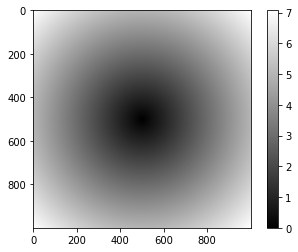

In [33]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()

In [34]:
# where

arr_1 = np.array([1,2,3,4,5])
arr_2 = np.array([-1,-2,-3,-4,-5])
cond_arr = np.array([bool(x % 2) for x in range(1,6)])

#we could do (very slow since all of it is in python)
selection = [x if z else y for x,y,z in zip(arr_1,arr_2,cond_arr)]
print(selection)

# instead do this
selection_np = np.where(cond_arr, arr_1, arr_2)
print(selection_np)


# where arguments can also be scalar
select_odd = np.where(arr_1 % 2 == 0, 0, arr_1)
print(select_odd)

[1, -2, 3, -4, 5]
[ 1 -2  3 -4  5]
[1 0 3 0 5]


In [35]:
# aggregations and reductions
arr = np.random.randn(3,3)
print(arr)

print(np.mean(arr))
print(np.sum(arr))

print(np.mean(arr, axis=0))

print("=======")
arr = np.arange(9, dtype=np.float64).reshape(3,3)
print(arr)

print(np.sum(arr, axis=0))
print(np.sum(arr, axis=1))

print(np.cumsum(arr, axis=1))

[[-0.09272175 -0.92476975  0.49808306]
 [-0.87751972 -0.19239431  1.2969245 ]
 [ 0.85549155  0.33986027  2.27328583]]
0.3529155194823203
3.1762396753408826
[-0.03824997 -0.25910126  1.3560978 ]
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[ 9. 12. 15.]
[ 3. 12. 21.]
[[ 0.  1.  3.]
 [ 3.  7. 12.]
 [ 6. 13. 21.]]


In [36]:
# boolean array

arr = np.random.randn(100)
print((arr>0).sum()) # boolean values are coerced into 0 and 1 so can be summed

print((arr>0).any())
print((arr>0).all())
arr[True] = 1 # turn all elements to 1
print(arr.all())

#sorting
arr = np.array([1,4,1,2,3,1])
arr.sort()
print(arr)

#quantiles
arr = np.arange(100)
print(arr[int(0.05 * len(arr))])

50
True
False
True
[1 1 1 2 3 4]
5


In [37]:
# set-like operations
arr_1 = np.array([1,1,2,3,4,4,4,4,5])
arr_2 = np.array([6,6,1,3])

print(np.unique(arr_1))
print(np.intersect1d(arr_1, arr_2))
print(np.union1d(arr_1, arr_2))
print(np.in1d(arr_1, arr_2)) # figures out whether each element in arr_1 is in arr_2
print(np.setdiff1d(arr_1, arr_2)) # elements in a but not in b
print(np.setxor1d(arr_1, arr_2)) # elements that are in one but no both

[1 2 3 4 5]
[1 3]
[1 2 3 4 5 6]
[ True  True False  True False False False False False]
[2 4 5]
[2 4 5 6]


In [38]:
!pwd
!ls -lrt

/home/rushi/dev/git/python
total 464
-rw-r--r-- 1 rushi rushi  89926 May  7 10:51 effective_python.ipynb
drwxr-xr-x 3 rushi rushi   4096 May 15 08:13 c_module
-rw-r--r-- 1 rushi rushi  97846 May 15 08:22 python_cookbook.ipynb
drwxr-xr-x 7 rushi rushi   4096 May 18 20:11 environment
-rw-r--r-- 1 rushi rushi 277150 May 29 07:55 PythonForDataAnalysis.ipynb


In [39]:
# file saving and loading
arr = np.arange(10)
np.save('../../data/some_array', arr)

In [40]:
!ls -lrt ../../data/


total 12
drwxr-xr-x 10 rushi rushi 4096 Jun  8  2017 pda
-rw-r--r--  1 rushi rushi  610 May 19 20:32 mult_arrays.npz
-rw-r--r--  1 rushi rushi  208 May 29 07:56 some_array.npy


In [41]:
arr = np.load('../../data/some_array.npy')
print(arr)

[0 1 2 3 4 5 6 7 8 9]


In [42]:
# saving multiple arrays
a_arr = np.arange(10)
b_arr = np.arange(5)
np.savez('../../data/mult_arrays.npz', a=a_arr, b=b_arr)
# can also use np.savez_compressed('arrays_compressed.npz')
values = np.load('../../data/mult_arrays.npz')
print(type(values))
print(values['a'])
print(values['b'])

<class 'numpy.lib.npyio.NpzFile'>
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]


In [43]:
#linear algebra
x = np.array([[1,2,3],[4,5,6]]) # 2x3 matrix
y = np.array([[1],[2], [4]]) # 3x1 matrix
print(np.dot(x,y))

# infix operator also does dot mult
print(x@y)

[[17]
 [38]]
[[17]
 [38]]


In [44]:
# basic linear algebra functions
arr = np.random.randn(3,3)
mat = arr.T.dot(arr)
print(mat)
print(np.linalg.inv(mat))
print(mat@np.linalg.inv(mat))

# TODO understand and do:
# eigens, pinv(penrose-moore pseudo inverse), qr decomposition,
# svd (singular value decomposition), solve Ax = b for x
# lstsq (least squares solution for ) Ax = b

[[ 4.67464061 -0.04253764  1.96951865]
 [-0.04253764  1.02893721  0.25966716]
 [ 1.96951865  0.25966716  1.02348103]]
[[ 1.7260858   0.97182692 -3.56812642]
 [ 0.97182692  1.58552145 -2.27238125]
 [-3.56812642 -2.27238125  8.4198476 ]]
[[ 1.00000000e+00  1.54551000e-16 -4.81922311e-16]
 [-4.25745828e-17  1.00000000e+00  3.19655132e-16]
 [ 6.22850125e-17  1.73697483e-16  1.00000000e+00]]


In [45]:
# pseudo random number generation

samples = np.random.normal(size=(4,4))
print(samples)

[[ 0.91795174  0.81621017  0.96531075  2.39100013]
 [ 0.34769946  0.11863859 -1.20030863 -1.20315011]
 [-0.87670833 -1.12646774 -0.30326402 -1.84027514]
 [ 0.22225853 -1.14265861 -0.89027679 -0.98458093]]


In [46]:
from random import normalvariate

# generating large number of samples is faster in numpy
# since it generates them simultaneously ?
N = 1000000
%timeit samples = [normalvariate(0,1) for _ in range(N)]

533 ms ± 29.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
%timeit np.random.normal(size=N)

23.1 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
# get the same random sequence
np.random.seed(1234)
print(np.random.rand(10))
np.random.seed(1234)
print(np.random.rand(10))

# instead of global state, use a generator instead
rng = np.random.RandomState(1234)
print(rng.randn(10))
rng = np.random.RandomState(1234)
print(rng.randn(10))

# TODO: Learn and run:
# binomial, beta, chisquare, gamme and uniform distributions


[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581 0.27259261
 0.27646426 0.80187218 0.95813935 0.87593263]
[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581 0.27259261
 0.27646426 0.80187218 0.95813935 0.87593263]
[ 0.47143516 -1.19097569  1.43270697 -0.3126519  -0.72058873  0.88716294
  0.85958841 -0.6365235   0.01569637 -2.24268495]
[ 0.47143516 -1.19097569  1.43270697 -0.3126519  -0.72058873  0.88716294
  0.85958841 -0.6365235   0.01569637 -2.24268495]


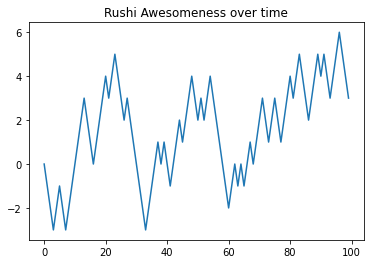

In [49]:
# random walk and simulation

import random
position = 0 
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

plt.title("Rushi Awesomeness over time")
plt.plot(walk[:100])

-7
62
255
[[  1   2   1 ...  48  47  48]
 [ -1  -2  -3 ...  36  37  36]
 [  1   2   1 ... -34 -35 -36]
 ...
 [ -1   0  -1 ...  66  65  66]
 [ -1  -2  -3 ...  -2  -3  -2]
 [  1   0   1 ...  34  33  34]]
-130
118
3379


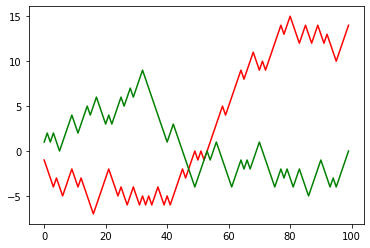

In [50]:
# can achieve the same effect as above 
# since a walk is just a collection of steps and a cumulative sum

nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
print(walk.min())
print(walk.max())

# first time a value crossed a threshold
print((np.abs(walk) >= 10).argmax())

#generating multiple random walk simulations
nwalks = 5000
draws = np.random.randint(0, 2, size=(nwalks,nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1) # cumsum over the 1st axis (not the 0th)
print(walks)

print(walks.min())
print(walks.max())


hits30 = (np.abs(walks) >= 30).any(1) # creats a boolean array
print(hits30.sum()) # number of walks that hit 30

# crossing times
(np.abs(walks[hits30]) >= 30).argmax(1)

# draw simultaneous
t = walks[1][:100]
z = walks[2][:100]
#print(t)
#print(z)
plt.plot(t,'r', z, 'g')

###  Chapter 5 - Pandas

In [51]:
# series (fixed value ordered dict with index(keys) and values (np array))

import pandas as pd
from pandas import Series, DataFrame

obj = Series([1,2,3,4]) # similar to np.array
print(obj)

# series have a sequence of values and an associated array of labels
# called its index

print(obj.values)
print(type(obj.values)) # is a numpy array !
print(type(obj.index))
print(obj.index)
#help(obj) --> TODO: Read the entire help


obj2 = pd.Series([1,2,3,4], index = ['a','b', 'c', 'd'])
print(obj2)
print(type(obj2.index))

# can use labels for access
print(obj2['c'])
print(obj2[2])

print("====")
# link preserved post numpy filtering
print(obj2[obj2 > 2])

# can also be passed to numpy universal functions
print(np.abs(obj2))


0    1
1    2
2    3
3    4
dtype: int64
[1 2 3 4]
<class 'numpy.ndarray'>
<class 'pandas.core.indexes.range.RangeIndex'>
RangeIndex(start=0, stop=4, step=1)
a    1
b    2
c    3
d    4
dtype: int64
<class 'pandas.core.indexes.base.Index'>
3
3
====
c    3
d    4
dtype: int64
a    1
b    2
c    3
d    4
dtype: int64


In [52]:
# Series can also be though of as a fixed length ordered dict
# mapping from index key to values

# dict like operations
print('b' in obj2)
print('e' in obj2)


# dict to series conversion
sdata = {'a' : 1, 'b' : 2, 'c' : 3, 'd': 4}
pdata = Series(sdata)
print(pdata)

# pass in a different order 
ordered_keys = ['a', 'b', 'd', 'e'] # exclude c, include e
pdata = Series(sdata, index=ordered_keys)
print(pdata) # will include e with a null value and exclude c
print(pdata.isnull())

True
False
a    1
b    2
c    3
d    4
dtype: int64
a    1.0
b    2.0
d    4.0
e    NaN
dtype: float64
a    False
b    False
d    False
e     True
dtype: bool


In [53]:
# data alignment by keys
sdata = {'a' : 1, 'b' : 2, 'c' : 3, 'd': 4}
pdata = Series(sdata)

sdata = {'a' : 1, 'b' : 2, 'c' : 3, 'e': 4}
pdata_2 = Series(sdata)

print(pdata + pdata_2)

#names to index and series 
pdata.name = "my_dataset"
pdata.index.name = "my_index"
print(pdata)

# indexes can be replaced in-place
pdata.index = range(4)
print(pdata)

a    2.0
b    4.0
c    6.0
d    NaN
e    NaN
dtype: float64
my_index
a    1
b    2
c    3
d    4
Name: my_dataset, dtype: int64
0    1
1    2
2    3
3    4
Name: my_dataset, dtype: int64


In [54]:
# dataframe
# table of data contains an ordered collection of columns.
# has a row and column index
# dict of series all sharing the same index

# assumption: the shared index is the row index and the 
# column index is the keys in the dict which has columns/Series as values ?

# construction from dict of equal length lists
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada']
        ,'year': [2000, 2001, 2002, 2001, 2002, 2003]
        ,'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

frame = DataFrame(data)
print(frame)

# can provide order of the columns as well as row indexes
frame2 = DataFrame(data, 
                   columns=['year', 'state', 'pop', 'empty'],
                   index=['one', 'two', 'three', 'four', 'five', 'six'])
print()
print(frame2)

print(frame2.columns)
print(type(frame2.columns))

print()
# access as dict key or attribute
print(frame2.year)# returns a series with the same index as the frame 
print(frame2['state']) 
print(frame2.year.name)
print(frame2.year.index)
print(frame2.year.values)

print("---")
# getting an entire row (with all columns from the frame)
print(frame2.loc['one']) 
# the return type is a series with the column names
# as the index of the series
print(type(frame2.loc['one']))
print(frame2.loc['one'].index)

    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2

       year   state  pop empty
one    2000    Ohio  1.5   NaN
two    2001    Ohio  1.7   NaN
three  2002    Ohio  3.6   NaN
four   2001  Nevada  2.4   NaN
five   2002  Nevada  2.9   NaN
six    2003  Nevada  3.2   NaN
Index(['year', 'state', 'pop', 'empty'], dtype='object')
<class 'pandas.core.indexes.base.Index'>

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64
one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object
year
Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')
[2000 2001 2002 2001 2002 2003]
---
year     2000
state    Ohio
pop       1.5
empty     NaN
Name: one, dtype: object
<class 'pandas.core.series.Series'>
Index(['year', 'state', 'pop', 'empty'], dtype='object')


In [55]:
# entire columns can be modified
print(len(frame2['empty']))
frame2['empty']  = np.arange(len(frame2['empty']))
print(frame2)

# can also do scalar assignments similar to np arrays
frame2['empty'] = 15
print(frame2)

6
       year   state  pop  empty
one    2000    Ohio  1.5      0
two    2001    Ohio  1.7      1
three  2002    Ohio  3.6      2
four   2001  Nevada  2.4      3
five   2002  Nevada  2.9      4
six    2003  Nevada  3.2      5
       year   state  pop  empty
one    2000    Ohio  1.5     15
two    2001    Ohio  1.7     15
three  2002    Ohio  3.6     15
four   2001  Nevada  2.4     15
five   2002  Nevada  2.9     15
six    2003  Nevada  3.2     15


In [56]:
# assign new columns
frame2['new_column'] = np.arange(6)
print(frame2)

       year   state  pop  empty  new_column
one    2000    Ohio  1.5     15           0
two    2001    Ohio  1.7     15           1
three  2002    Ohio  3.6     15           2
four   2001  Nevada  2.4     15           3
five   2002  Nevada  2.9     15           4
six    2003  Nevada  3.2     15           5


In [57]:
# assign new series

# this will not work since the series does not have the 
# right indexes
new_column_2 = pd.Series([x for x in range(6)])
frame2['new_column_2'] = new_column_2
print(frame2)

#assigning the indexes to the series will make it work
print("==========")
new_column_2 = pd.Series([x for x in range(6)],
                         index=frame2.index)
frame2['new_column_2'] = new_column_2
print(frame2)

# deleting columns
del frame2['new_column_2']
print(frame2.columns)

       year   state  pop  empty  new_column  new_column_2
one    2000    Ohio  1.5     15           0           NaN
two    2001    Ohio  1.7     15           1           NaN
three  2002    Ohio  3.6     15           2           NaN
four   2001  Nevada  2.4     15           3           NaN
five   2002  Nevada  2.9     15           4           NaN
six    2003  Nevada  3.2     15           5           NaN
       year   state  pop  empty  new_column  new_column_2
one    2000    Ohio  1.5     15           0             0
two    2001    Ohio  1.7     15           1             1
three  2002    Ohio  3.6     15           2             2
four   2001  Nevada  2.4     15           3             3
five   2002  Nevada  2.9     15           4             4
six    2003  Nevada  3.2     15           5             5
Index(['year', 'state', 'pop', 'empty', 'new_column'], dtype='object')


In [58]:
# nested dictionaries for pandas dataframe construction

pop = {'nevada' : {2001: 2.4, 2002: 2.9},
       'ohio' : {2000: 1.5, 2001:1.6, 2002:3.5}}
pop_frame = DataFrame(pop)
print(pop_frame)
# the inner keys are considered to be the row indexes
# the outer keys are considered to be the column indexes
print(pop_frame.columns)
print(pop_frame.index)
# getting a particular row 
print(pop_frame.loc[2002])

# dataframe can be transposed
print(pop_frame.T)

# values will return a 2 dimensional array with all of the values
print(pop_frame.values)
print(pop_frame.values.shape)
print(pop_frame.T.values.shape)

      nevada  ohio
2001     2.4   1.6
2002     2.9   3.5
2000     NaN   1.5
Index(['nevada', 'ohio'], dtype='object')
Int64Index([2001, 2002, 2000], dtype='int64')
nevada    2.9
ohio      3.5
Name: 2002, dtype: float64
        2001  2002  2000
nevada   2.4   2.9   NaN
ohio     1.6   3.5   1.5
[[2.4 1.6]
 [2.9 3.5]
 [nan 1.5]]
(3, 2)
(2, 3)


In [59]:
# construction methods for data frame

# np 2d array
np_2d = np.arange(10).reshape(2,5)
print(np_2d)

pd = DataFrame(np_2d,
               columns=['one', 'two', 'three', 'four', 'five'],
               index=['row_one', 'row_two']
              )
print(pd)
print("=====")

# dict of arrays, lists or tuples
# keys of dict are interpreted as column names
my_dict = {'col_a' : [1,2,3,4,5],
          'col_b' : [x for x in range(5)],
          'col_c' : ['a', 'b', 'c', 'd', 'e']}
pd = DataFrame(my_dict)
print(pd)

# dict of series
series_1 = Series([1,2,3,4,5], index=['a','b','c','d','e'])
series_2 = Series([2,2,2,2,2], index=['a','b','c','d','e'])
pd = DataFrame({'column_1' : series_1, 'column_2' : series_2})
print("===")
print(pd)

# dict of dict (inner key is a row label)
pop = {'nevada' : {2001: 2.4, 2002: 2.9},
       'ohio' : {2000: 1.5, 2001:1.6, 2002:3.5}}
pop_frame = DataFrame(pop)
print(pop_frame)

# list of series, union of indexes in series is the column index
pd = DataFrame([series_1, series_2])
print(pd)
print(pd.T)

# list of dicts
dict_1 = {'a' : 1, 'b': 2}
dict_2 = {'c' : 1, 'b': 2}
pd = DataFrame([dict_1, dict_2])
print(pd)

# list of lists or tuples (same as 2dim nd array)
list_1 = [0,1,2]
list_2 = [1,2,3]
pd = DataFrame([list_1, list_2])
# same as [[],[]] which is the same way a 2dim array looks
print("=========")
print(pd)

#  Different dataframe
# earlier dataframe had two rows.
my_pd = DataFrame(pd, index=['row_1', 'row_2'])
print(my_pd) 

my_pd_2 = DataFrame(pd)
print(my_pd_2)

# TODO: numpy maskled array and numpy structured record/record array

[[0 1 2 3 4]
 [5 6 7 8 9]]
         one  two  three  four  five
row_one    0    1      2     3     4
row_two    5    6      7     8     9
=====
   col_a  col_b col_c
0      1      0     a
1      2      1     b
2      3      2     c
3      4      3     d
4      5      4     e
===
   column_1  column_2
a         1         2
b         2         2
c         3         2
d         4         2
e         5         2
      nevada  ohio
2001     2.4   1.6
2002     2.9   3.5
2000     NaN   1.5
   a  b  c  d  e
0  1  2  3  4  5
1  2  2  2  2  2
   0  1
a  1  2
b  2  2
c  3  2
d  4  2
e  5  2
     a  b    c
0  1.0  2  NaN
1  NaN  2  1.0
   0  1  2
0  0  1  2
1  1  2  3
        0   1   2
row_1 NaN NaN NaN
row_2 NaN NaN NaN
   0  1  2
0  0  1  2
1  1  2  3


In [60]:
# index objects
import pandas as pd

pd_d = DataFrame(range(3), index=['a', 'b', 'c'])
print(pd_d.index)
print(type(pd_d.index))
print(pd_d.index[1:])

# create new lables
labels = pd.Index(np.arange(3))
print(labels)

new_series = pd.Series([0,1,2], index=labels)
print(new_series.index is labels)



Index(['a', 'b', 'c'], dtype='object')
<class 'pandas.core.indexes.base.Index'>
Index(['b', 'c'], dtype='object')
Int64Index([0, 1, 2], dtype='int64')
True


In [61]:
dict_1 = {'a' : 1, 'b': 2}
dict_2 = {'a' : 3, 'b': 4}
pd_d = DataFrame([dict_1, dict_2])
print(pd_d)

print(pd_d.columns)

# set like semantics
print('a' in pd_d.columns)

import pandas as pd 
# pandas index can contain duplicate labels
labels = pd.Index(['a','d','d'])
print(labels)

pd_d = DataFrame(np.arange(3), labels)
print(pd_d)

print(type(pd_d.T['d'])) # if there are multiple selections, returns a dataframe
print(type(pd_d.T['a'])) # if there is a single selection, returns a series

   a  b
0  1  2
1  3  4
Index(['a', 'b'], dtype='object')
True
Index(['a', 'd', 'd'], dtype='object')
   0
a  0
d  1
d  2
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [62]:
# essential functionality

obj = pd.Series([1,2,3,4], index=['a', 'b', 'c', 'd'])
print(obj)
obj2 = obj.reindex(['c', 'd', 'b', 'a', 'e']) # re-arrange + introduce new
print(obj2)

a    1
b    2
c    3
d    4
dtype: int64
c    3.0
d    4.0
b    2.0
a    1.0
e    NaN
dtype: float64


In [63]:
obj = pd.Series(['Apple', 'Orange', 'Banana'], index=[0,5,7])
print(obj)
obj2 = obj.reindex(range(8), method='ffill')
print(obj2)

obj3 = obj.reindex(range(8), method='bfill')
print(obj3)

obj4 = obj.reindex(range(8), method='nearest')
print(obj4)

0     Apple
5    Orange
7    Banana
dtype: object
0     Apple
1     Apple
2     Apple
3     Apple
4     Apple
5    Orange
6    Orange
7    Banana
dtype: object
0     Apple
1    Orange
2    Orange
3    Orange
4    Orange
5    Orange
6    Banana
7    Banana
dtype: object
0     Apple
1     Apple
2     Apple
3    Orange
4    Orange
5    Orange
6    Banana
7    Banana
dtype: object


In [64]:
obj = pd.DataFrame({'a': [0,3] , 'b': [2,3]})
print(obj)

obj2 = obj.reindex(columns=['a', 'e','f'], method='ffill')
print(obj2)

   a  b
0  0  2
1  3  3
   a  e  f
0  0  2  2
1  3  3  3


In [65]:
# dropping indexes
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

print(data)
data2 = data.drop(['Ohio', 'Utah']) # drops axis 0
print(data2)
data3 = data2.drop(['two', 'three'], axis=1) # drops axis 1
print(data3)

data.drop(['Ohio'], inplace=True)
print(data)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15
          one  two  three  four
Colorado    4    5      6     7
New York   12   13     14    15
          one  four
Colorado    4     7
New York   12    15
          one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


In [66]:
# indexing, selection and filtering

obj = pd.Series(np.arange(4.), index = ['a','b','c','d'])
print(obj['a'] == obj[0])

print(obj[2:4] == obj[['c', 'd']])
print(obj[obj<2])

True
c    True
d    True
dtype: bool
a    0.0
b    1.0
dtype: float64


In [67]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

# for dataframes, only columns are directly accesible
#print(data[['Ohio']]) --> Error
print(data)
print(data['one'])
print(data['one'] % 8 == 0) # creates a one dim selection array
print(data[data['one'] % 8 == 0])

#special case to select rows
print(data[:2])

# passing in non labels does not work
# though this  works for the series, it does not work for datframe
#rint(data[2])

data[data['one'] % 8 == 0] = 19
print(data)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15
Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int64
Ohio         True
Colorado    False
Utah         True
New York    False
Name: one, dtype: bool
      one  two  three  four
Ohio    0    1      2     3
Utah    8    9     10    11
          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
          one  two  three  four
Ohio       19   19     19    19
Colorado    4    5      6     7
Utah       19   19     19    19
New York   12   13     14    15


In [68]:
# loc and iloc 
# dataframe label-indexing on the rows
# loc uses the axes labels
# iloc uses the integers directly
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

#selecting a single row returns a series
# which has the column indexes as it's row index
data_ohio = data.loc['Ohio', ['two', 'three']]
print(data_ohio)
print(type(data_ohio))

data_sel = data.iloc[0, [0,1,2]]
print(data_sel)
print(type(data_sel))

#select all columns
data_sel = data.iloc[0]
print(data_sel)

#selecting multiple rows and columns
# this results in a dataframe
data_sel = data.loc[['Ohio', 'Colorado'], ['one', 'two']]
print(data_sel)
print(type(data_sel))

# can use a list for rows, columns
# can also use slices ':' notation
# can use single labels
# can mix and match

data_sel = data.loc['Ohio', 'two']
print(data_sel)

data_sel = data.loc['Ohio', 'two':]
print(data_sel)

print(data.iloc[:,3:][data['four'] > 6])

two      1
three    2
Name: Ohio, dtype: int64
<class 'pandas.core.series.Series'>
one      0
two      1
three    2
Name: Ohio, dtype: int64
<class 'pandas.core.series.Series'>
one      0
two      1
three    2
four     3
Name: Ohio, dtype: int64
          one  two
Ohio        0    1
Colorado    4    5
<class 'pandas.core.frame.DataFrame'>
1
two      1
three    2
four     3
Name: Ohio, dtype: int64
          four
Colorado     7
Utah        11
New York    15


In [69]:
# integer indexing

ser = pd.Series(np.arange(3))
print(ser)

# the below does not work since there is no index with -1
# this is different from python's list indexing since -1
# returns the last element
#print(ser[-1]) 

# this is because when the index is formed out of integers
# indexing using -1 can be both label based and integer based
# which can be confusing

# if the axis has any integers, the indexing is going to be label based

ser = pd.Series(np.arange(3), index=['a', 'b', 'c'])
print(ser[-1]) # works


ser = pd.Series(np.arange(3), index=['a', 'b', 5])
#print(ser[-1]) # does not work


0    0
1    1
2    2
dtype: int64
2


In [70]:
# arithmetic and data alignment

#nan propagation

s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])

print(s1)
print(s2)

# for indexes that don't exist in both; it's 
# as though we are adding NaN to a value which is the same as Nan
print(s1 + s2)


# it's the same for dataframes
# adding columns + indexes that don't exist in both dataframes
# will result in NaN values

df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('abc'),
                   index=['Ohio', 'Texas', 'Colorado'])

df2 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'NY', 'Colorado'])

print(df1 + df2)

# to do the above, a fill value maybe useful

print(df1.add(df2, fill_value=0))
print(df1.radd(df2, fill_value=0))
#help(df1.radd)

# radd, rsub, etc
# when doing something like a + b 
# what's invoked is actually a.__add__(b)
# however, this is not useful when adding with a scalar
# example: obj + 4 results in obj.__add__(4).
# however, 4+ obj results in 4.__add__(obj) which is not implemented
# when this happens, python invokes obj.__radd__(4) as a fallback

# for dataframes this is useful since operations with scalars are common


a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64
a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64
a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64
           a     b     c   d
Colorado NaN  13.0  15.0 NaN
NY       NaN   NaN   NaN NaN
Ohio     NaN   1.0   3.0 NaN
Texas    NaN   NaN   NaN NaN
            a     b     c    d
Colorado  6.0  13.0  15.0  8.0
NY        NaN   3.0   4.0  5.0
Ohio      0.0   1.0   3.0  2.0
Texas     3.0   4.0   5.0  NaN
            a     b     c    d
Colorado  6.0  13.0  15.0  8.0
NY        NaN   3.0   4.0  5.0
Ohio      0.0   1.0   3.0  2.0
Texas     3.0   4.0   5.0  NaN


In [71]:
# operations between data frames and series 

# is similar to opeartions between numpy arrays of different 
# dimensions where the operation gets broadcasted to lower dimensions


df2 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'NY', 'Colorado'])

print(df2)
sub_series = pd.Series(np.arange(3), index=list('bcd'))
print(sub_series)

# series is one dimensional, df is two, 
# this operation is therefore applied to all of the rows of df (lower dimensions)
print(df2 - sub_series)

# can also broadcast over columns matching on rows
sub_series = pd.Series([5], index=['Ohio'])
print(df2.sub(sub_series, axis='index'))

# subtract a columns values from all other columns
print(df2.sub(df2['d'], axis='index'))

            b    c    d
Ohio      0.0  1.0  2.0
NY        3.0  4.0  5.0
Colorado  6.0  7.0  8.0
b    0
c    1
d    2
dtype: int64
            b    c    d
Ohio      0.0  0.0  0.0
NY        3.0  3.0  3.0
Colorado  6.0  6.0  6.0
            b    c    d
Colorado  NaN  NaN  NaN
NY        NaN  NaN  NaN
Ohio     -5.0 -4.0 -3.0
            b    c    d
Ohio     -2.0 -1.0  0.0
NY       -2.0 -1.0  0.0
Colorado -2.0 -1.0  0.0


In [72]:
#  function application and mapping
df2 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'NY', 'Colorado'])

print(df2)
print(np.sqrt(df2))

f = lambda x : x.max() - x.min()

# applies across rows by default 

print(df2.apply(f))
print(df2.apply(f, axis=0))

print(df2.apply(f, axis='columns'))
print(df2.apply(f, axis=1))

# applymap allows application of a function to each value

f = lambda x : x + 2
print(df2.applymap(f))

            b    c    d
Ohio      0.0  1.0  2.0
NY        3.0  4.0  5.0
Colorado  6.0  7.0  8.0
                 b         c         d
Ohio      0.000000  1.000000  1.414214
NY        1.732051  2.000000  2.236068
Colorado  2.449490  2.645751  2.828427
b    6.0
c    6.0
d    6.0
dtype: float64
b    6.0
c    6.0
d    6.0
dtype: float64
Ohio        2.0
NY          2.0
Colorado    2.0
dtype: float64
Ohio        2.0
NY          2.0
Colorado    2.0
dtype: float64
            b    c     d
Ohio      2.0  3.0   4.0
NY        5.0  6.0   7.0
Colorado  8.0  9.0  10.0


In [73]:
# sorting and ranking
obj = pd.Series(range(4), list('acdb'))
print(obj.index)
print(obj.sort_index())
print(obj.sort_values())

# use data in multiple columns

frame = pd.DataFrame({'b': [4, 7, -3, 7], 'a': [0, 1, 0, 3]})
print(frame)

print(frame.sort_values(by='b'))
print(frame.sort_values(by=['b', 'a']))

Index(['a', 'c', 'd', 'b'], dtype='object')
a    0
b    3
c    1
d    2
dtype: int64
a    0
c    1
d    2
b    3
dtype: int64
   b  a
0  4  0
1  7  1
2 -3  0
3  7  3
   b  a
2 -3  0
0  4  0
1  7  1
3  7  3
   b  a
2 -3  0
0  4  0
1  7  1
3  7  3


In [74]:
# ranking (TODO: The purpose of this is not understood)

In [75]:
# duplicate index results in a dataframe being returned 
# during an access rather than a series (explored above)

In [76]:
df = DataFrame(np.arange(16).reshape(4,4), index=list('abcd'), columns=list('1234'))
print(df)

print(df.sum())
print(df.sum(axis=1))
print(df.idxmax()) # index with the largest element
print(df.idxmin())
print(df.cumsum())
print(df.describe())
print(df.apply(lambda x : x.describe(), axis=1))
# better version df.apply(df.DataFrame.describe, axis=1) # use the class method whose first argument will be df


    1   2   3   4
a   0   1   2   3
b   4   5   6   7
c   8   9  10  11
d  12  13  14  15
1    24
2    28
3    32
4    36
dtype: int64
a     6
b    22
c    38
d    54
dtype: int64
1    d
2    d
3    d
4    d
dtype: object
1    a
2    a
3    a
4    a
dtype: object
    1   2   3   4
a   0   1   2   3
b   4   6   8  10
c  12  15  18  21
d  24  28  32  36
               1          2          3          4
count   4.000000   4.000000   4.000000   4.000000
mean    6.000000   7.000000   8.000000   9.000000
std     5.163978   5.163978   5.163978   5.163978
min     0.000000   1.000000   2.000000   3.000000
25%     3.000000   4.000000   5.000000   6.000000
50%     6.000000   7.000000   8.000000   9.000000
75%     9.000000  10.000000  11.000000  12.000000
max    12.000000  13.000000  14.000000  15.000000
   count  mean       std   min    25%   50%    75%   max
a    4.0   1.5  1.290994   0.0   0.75   1.5   2.25   3.0
b    4.0   5.5  1.290994   4.0   4.75   5.5   6.25   7.0
c    4.0   9.5  1.290994 

In [77]:
# correlation and covariance
import pandas_datareader.data as web

all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG', 'SPY']}


price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})

volume = pd.DataFrame({ticker: data['Volume']
                       for ticker, data in all_data.items()})

#print(price)
#print(volume)

/home/rushi/dev/git/python/environment/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [78]:
returns = price.pct_change()
print(returns)

                AAPL       IBM      MSFT      GOOG       SPY
Date                                                        
2015-06-01       NaN       NaN       NaN       NaN       NaN
2015-06-02 -0.004443 -0.003114 -0.006564  0.009719 -0.000993
2015-06-03  0.001231  0.001592 -0.001492  0.002096  0.002650
2015-06-04 -0.005841 -0.009063 -0.010459 -0.006681 -0.008446
2015-06-05 -0.005489 -0.005820 -0.004746 -0.006279 -0.001713
...              ...       ...       ...       ...       ...
2020-05-21 -0.007455 -0.018619 -0.012011 -0.002787 -0.006904
2020-05-22  0.006438 -0.006128  0.000436  0.005432  0.001899
2020-05-26 -0.006774  0.028465 -0.010572  0.004679  0.012321
2020-05-27  0.004357  0.031045  0.001322  0.000579  0.014879
2020-05-28  0.000440 -0.008045 -0.002255 -0.000783 -0.001845

[1258 rows x 5 columns]


In [79]:
print(returns['MSFT'].cov(returns['GOOG']))
print(returns['MSFT'].corr(returns['GOOG']))

0.00022112030310993166
0.7508337420726041


In [80]:
returns.corr()

,AAPL,IBM,MSFT,GOOG,SPY
AAPL,1.000000,0.531396,0.711086,0.642149,0.764219
IBM,0.531396,1.000000,0.596898,0.527838,0.743120
MSFT,0.711086,0.596898,1.000000,0.750834,0.832724
GOOG,0.642149,0.527838,0.750834,1.000000,0.736546
SPY,0.764219,0.743120,0.832724,0.736546,1.000000


In [81]:
print(volume.tail())
print(returns.corrwith(volume))

                  AAPL        IBM        MSFT     GOOG          SPY
Date                                                               
2020-05-21  25672200.0  4000900.0  29119500.0  1385000   78293900.0
2020-05-22  20450800.0  4180800.0  20826900.0  1309400   63958200.0
2020-05-26  31380500.0  5469300.0  36073600.0  2060600   88951400.0
2020-05-27  28236300.0  5727500.0  39517100.0  1685800  104817400.0
2020-05-28  33390200.0  3915300.0  33810200.0  1692200   90405200.0
AAPL   -0.140546
IBM    -0.103913
MSFT   -0.066232
GOOG   -0.037800
SPY    -0.219601
dtype: float64


In [82]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
print(obj.unique())
print(obj.describe())
print("---")
# creates a boolean array indicating if each element is in the 
# filtered list
print(obj.isin(['b', 'c']))
mask = obj.isin(['b','c'])
print(obj[mask].unique())

['c' 'a' 'd' 'b']
count     9
unique    4
top       a
freq      3
dtype: object
---
0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool
['c' 'b']


###  Chapter 6 - Data Loading / Storage / File Formats

In [83]:
!cat ../../data/pda/ch06/ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [84]:
df = pd.read_csv('../../data/pda/ch06/ex1.csv')
print(df)

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo


In [85]:
!ls -lrt ../../data/pda/ch06/ex2.csv
!cat ../../data/pda/ch06/ex2.csv

-rw-r--r-- 1 rushi rushi 42 Jun  8  2017 ../../data/pda/ch06/ex2.csv
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [86]:
# no header needs to be specified otherwise pandas reader will assume that
# line one is the header
df = pd.read_csv('../../data/pda/ch06/ex2.csv', header=None,
                names=['a','b','c','d','message'])
print(df)

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo


In [87]:
# specify one of the columns as the index
df = pd.read_csv('../../data/pda/ch06/ex2.csv', header=None,
                names=['a','b','c','d','message'],
                index_col='message')
print(df)

         a   b   c   d
message               
hello    1   2   3   4
world    5   6   7   8
foo      9  10  11  12


In [88]:
!cat ../../data/pda/ch06/csv_mindex.csv

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [89]:
# choose heirarchical indexes by specifying multiple index columns
df = pd.read_csv('../../data/pda/ch06/csv_mindex.csv',                
                index_col=['key1', 'key2'])
print(df)

           value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16


In [90]:
display(list(open('../../data/pda/ch06/ex3.csv')))

# read_table reads tabular format. In the 
# special case where there is one fewer element
# in the first row, the first row is interpreted as the row index
# also specify variable white space as the delimiter
result = pd.read_table('../../data/pda/ch06/ex3.csv', sep='\s+')
display(result)

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491']

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [91]:
# skip rows

display(list(open('../../data/pda/ch06/ex4.csv')))
result = pd.read_csv('../../data/pda/ch06/ex4.csv', skiprows=[0,2,3])
display(result)

['# hey!\n',
 'a,b,c,d,message\n',
 '# just wanted to make things more difficult for you\n',
 '# who reads CSV files with computers, anyway?\n',
 '1,2,3,4,hello\n',
 '5,6,7,8,world\n',
 '9,10,11,12,foo']

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [92]:
# handling missing values
display(list(open('../../data/pda/ch06/ex5.csv')))
result = pd.read_csv('../../data/pda/ch06/ex5.csv')
display(result)

['something,a,b,c,d,message\n',
 'one,1,2,3,4,NA\n',
 'two,5,6,,8,world\n',
 'three,9,10,11,12,foo']

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [93]:
# handling missing values
display(list(open('../../data/pda/ch06/ex5.csv')))
result = pd.read_csv('../../data/pda/ch06/ex5.csv')
display(result)

display(pd.isnull(result))

['something,a,b,c,d,message\n',
 'one,1,2,3,4,NA\n',
 'two,5,6,,8,world\n',
 'three,9,10,11,12,foo']

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [94]:
# handling missing values
display(list(open('../../data/pda/ch06/ex5.csv')))
result = pd.read_csv('../../data/pda/ch06/ex5.csv')
display(result)

# can also take a na_values argument to specify missing elements
# can also specify sentinel values to indicate missing elements for each column

# indicate that foo and two are also missing values
sentinels = {'message' : ['foo', 'NA'], 'something' : ['two']}
result = pd.read_csv('../../data/pda/ch06/ex5.csv', na_values=sentinels)
display(result)


['something,a,b,c,d,message\n',
 'one,1,2,3,4,NA\n',
 'two,5,6,,8,world\n',
 'three,9,10,11,12,foo']

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


In [95]:
pd.options.display.max_rows = 10
result = pd.read_csv('../../data/pda/ch06/ex6.csv')
display(result)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [96]:
# select number of rows to read
result = pd.read_csv('../../data/pda/ch06/ex6.csv', nrows=4)
print(result)

# read file in chunks
# 1000 rows at a time
chunker = pd.read_csv('../../data/pda/ch06/ex6.csv', chunksize=1000)
print(type(chunker))

totals = pd.Series([], dtype=np.float64)
for chunk in chunker:    
    # need to specify fill values since the keys of each
    # new segment are going to be different
    totals = totals.add(chunk['key'].value_counts(), fill_value=0)
print(totals)

        one       two     three      four key
0  0.467976 -0.038649 -0.295344 -1.824726   L
1 -0.358893  1.404453  0.704965 -0.200638   B
2 -0.501840  0.659254 -0.421691 -0.057688   G
3  0.204886  1.074134  1.388361 -0.982404   R
<class 'pandas.io.parsers.TextFileReader'>
0    151.0
1    146.0
2    152.0
3    162.0
4    171.0
     ...  
V    328.0
W    305.0
X    364.0
Y    314.0
Z    288.0
Length: 36, dtype: float64


In [97]:
# writing to files
import sys

data = pd.read_csv('../../data/pda/ch06/ex5.csv')
print(data)

# writing to stdout but can be written to any file
data.to_csv(sys.stdout, sep=',')

print("=========")

data.to_csv(sys.stdout, sep=',', index=False, header=False)


  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo
,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo
one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [98]:
# csv, json are straightforward

# xml and html is uninteresting

In [99]:
# can only be run once
#hdf5 files with pandas
# need to pip install tables
#df = pd.DataFrame({'a' : pd.Series(np.arange(100))})
#store = pd.HDFStore('/var/tmp/mydata.h5')
#store['obj1'] = df # store a frame
#store['obj1_col'] = df['a'] # store a series
#help(store)
#print(store['obj1'])

HDF5ExtError: HDF5 error back trace

  File "H5F.c", line 509, in H5Fopen
    unable to open file
  File "H5Fint.c", line 1400, in H5F__open
    unable to open file
  File "H5Fint.c", line 1700, in H5F_open
    unable to read superblock
  File "H5Fsuper.c", line 623, in H5F__super_read
    truncated file: eof = 96, sblock->base_addr = 0, stored_eof = 2048

End of HDF5 error back trace

Unable to open/create file '/var/tmp/mydata.h5'

In [100]:
# scrape web apis

import requests
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
data = resp.json()
issues = pd.DataFrame(data, columns=['number', 'title', 'state'])
print(issues)

    number                                              title state
0    34455  BUG: Groupby.apply raises KeyError for Float64...  open
1    34454  TST/REF: refactor the arithmetic tests for Int...  open
2    34453  [ENH] Allow pad, backfill and cumcount in grou...  open
3    34452  BUG: groupby.tshift inconsistent behavior with...  open
4    34450                            BUG: Fixes Issue #34318  open
..     ...                                                ...   ...
25   34412  DOC:/USAGE: Resulting Index when merging over ...  open
26   34411  BUG: pd.read_sql returns empty list if query h...  open
27   34410    32-bit compat issues in MacPython/pandas-wheels  open
28   34407            Revert "CLN: _consolidate_inplace less"  open
29   34406                           PERF: asv runner is down  open

[30 rows x 3 columns]


In [ ]:
# extracting from database is not interesting
# can be done via tools like sqlalchemy

###  Chapter 7 - Data Cleaning and Preparation


In [101]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
print(string_data)
print(string_data.isnull())
string_data[0] = None
print(string_data.isnull()) # missing data is treated the same as None Data
print(string_data.dropna())
print(string_data.fillna(value="Unknown"))
#help(string_data.fillna)

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object
0    False
1    False
2     True
3    False
dtype: bool
0     True
1    False
2     True
3    False
dtype: bool
1    artichoke
3      avocado
dtype: object
0      Unknown
1    artichoke
2      Unknown
3      avocado
dtype: object


In [102]:
from pandas import NA
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])

display(data)
display(data.dropna()) # drops any row with a single missing value
display(data.dropna(how='all')) # drops row only if all values are missing
data[4] = NA
display(data)
display(data.dropna(how='all', axis='columns'))

,0,1,2
0,1,6.5,3
1,1,<NA>,<NA>
2,<NA>,<NA>,<NA>
3,<NA>,6.5,3


,0,1,2
0,1,6.5,3


,0,1,2
0,1,6.5,3
1,1,<NA>,<NA>
3,<NA>,6.5,3


,0,1,2,4
0,1,6.5,3,<NA>
1,1,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>
3,<NA>,6.5,3,<NA>


,0,1,2
0,1,6.5,3
1,1,<NA>,<NA>
2,<NA>,<NA>,<NA>
3,<NA>,6.5,3


In [108]:
df = pd.DataFrame(np.random.rand(7,3))
print(df)
print(df.iloc[:4, 1])
df.iloc[:4,1] = NA
print(df)
print(df.iloc[:4, 1])
print(df.dropna())

          0         1         2
0  0.239576  0.175857  0.085997
1  0.531829  0.900339  0.661512
2  0.824061  0.602951  0.810893
3  0.997332  0.268821  0.985430
4  0.044348  0.953584  0.127112
5  0.535118  0.713759  0.441978
6  0.916942  0.732790  0.315209
0    0.175857
1    0.900339
2    0.602951
3    0.268821
Name: 1, dtype: float64
          0         1         2
0  0.239576      <NA>  0.085997
1  0.531829      <NA>  0.661512
2  0.824061      <NA>  0.810893
3  0.997332      <NA>  0.985430
4  0.044348  0.953584  0.127112
5  0.535118  0.713759  0.441978
6  0.916942   0.73279  0.315209
0    <NA>
1    <NA>
2    <NA>
3    <NA>
Name: 1, dtype: object
          0         1         2
4  0.044348  0.953584  0.127112
5  0.535118  0.713759  0.441978
6  0.916942   0.73279  0.315209


In [110]:
df = pd.DataFrame(np.random.rand(7,3))
df.iloc[:4,1] = NA
df.fillna(0, inplace=True)
print(df)

          0         1         2
0  0.573179  0.000000  0.287308
1  0.482616  0.000000  0.150670
2  0.829959  0.000000  0.994264
3  0.256114  0.000000  0.494107
4  0.448897  0.091288  0.251903
5  0.223908  0.512690  0.746506
6  0.584577  0.765317  0.151905


In [122]:
# remove duplicates
data = DataFrame({'k1' : ['one', 'two'] * 3, 'k2' : [1,2] * 3})
print(data)

print(data.duplicated())
print(data.drop_duplicates())
print(data[~data.duplicated()])

# identify duplicates on a column
data = DataFrame({'k1' : ['one', 'two'] * 3, 'k2' : [1,2] * 3})
data['v1'] = range(6)
print(data)
print(data.drop_duplicates(['k1'], keep='last'))


    k1  k2
0  one   1
1  two   2
2  one   1
3  two   2
4  one   1
5  two   2
0    False
1    False
2     True
3     True
4     True
5     True
dtype: bool
    k1  k2
0  one   1
1  two   2
    k1  k2
0  one   1
1  two   2
    k1  k2  v1
0  one   1   0
1  two   2   1
2  one   1   2
3  two   2   3
4  one   1   4
5  two   2   5
    k1  k2  v1
4  one   1   4
5  two   2   5


In [141]:
# applying functions (data transformation)

data = pd.DataFrame(np.random.randn(7,3), columns=["a", "b", "c"], index=list("defghij"))
print(data)
data['z'] = data['a'].map(lambda x : 0 if x < 0 else 1)
print(data)

# replacing values
ser = Series([1,0,1,0])
ser.replace(0, 3, inplace=True)
print(ser)
# replace 1s and 3s with 2s and 4s
ser.replace([1,3], [2,4], inplace=True)
print(ser)

# replace 2s and 4s with 5
ser.replace([2,4], 5, inplace=True)
print(ser)

          a         b         c
d  0.043122  0.958574 -0.378383
e -0.980083  0.436512 -0.129505
f -1.352789 -0.662038  0.199630
g -0.416333 -0.667304 -2.146019
h -1.484204 -0.363301  1.060910
i -0.273175 -1.396828  0.415028
j -1.082988 -0.569401  1.661106
          a         b         c  z
d  0.043122  0.958574 -0.378383  1
e -0.980083  0.436512 -0.129505  0
f -1.352789 -0.662038  0.199630  0
g -0.416333 -0.667304 -2.146019  0
h -1.484204 -0.363301  1.060910  0
i -0.273175 -1.396828  0.415028  0
j -1.082988 -0.569401  1.661106  0
0    1
1    3
2    1
3    3
dtype: int64
0    2
1    4
2    2
3    4
dtype: int64
0    5
1    5
2    5
3    5
dtype: int64


In [148]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
print(data)
print(data.index)
print(data.columns)
# instead of this two step process with map and reassign, rename can be used
data.index = data.index.map(lambda x : x.lower())
print(data.index)

# creates another df with renamed indexes
df2 = data.rename(index=str.title, columns=str.upper)
print(df is df2)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11
Index(['Ohio', 'Colorado', 'New York'], dtype='object')
Index(['one', 'two', 'three', 'four'], dtype='object')
Index(['ohio', 'colorado', 'new york'], dtype='object')
False


In [157]:
# binning and discretization
# array of ages
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
# bins that the array should be categorized into
# Eg: 18-25, 25-35, ....
bins = [18,25,35,60,100]
cats = pd.cut(ages, bins)
print(cats) # 4 categories and transforms each element into the category

print(cats.value_counts())
print(cats.categories)
print(cats.codes)

# can add names to the bins
group_names = ["young", "youngadult", "middle-aged", "senior"]
cats = pd.cut(ages, bins, labels=group_names)
print(cats)

# cuts by default without bins will separate 
# into equal sized bins based on max and min values
# number of bins will need to be given
cats = pd.cut(ages, 5)
print(cats)

# qcut divides into quantiles and so 
# will divide into bins with equal number of elements
data = np.random.randn(1000)
cuts = pd.qcut(data, 4) # cut into 4 quantiles
print(cuts.value_counts())

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64
IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')
[0 0 0 1 0 0 2 1 3 2 2 1]
[young, young, young, youngadult, young, ..., youngadult, senior, middle-aged, middle-aged, youngadult]
Length: 12
Categories (4, object): [young < youngadult < middle-aged < senior]
[(19.959, 28.2], (19.959, 28.2], (19.959, 28.2], (19.959, 28.2], (19.959, 28.2], ..., (28.2, 36.4], (52.8, 61.0], (44.6, 52.8], (36.4, 44.6], (28.2, 36.4]]
Length: 12
Categories (5, interval[float64]): [(19.959, 28.2] < (28.2, 36.4] < (36.4, 44.6] < (44.6, 52.8] < (52.8, 61.0]]
(-3.646, -0.544]    250
(-0.544, 0.114]     250
(0.114, 0.698]      250
(0.698, 3.32]       250
dtype: int64


In [175]:
# detection and filtering of outliers
data = DataFrame(np.random.randn(10,5), columns=list('abcde'))
display(data.describe())

#select all values in a column exceeding 1
print(data['a'][data['a'] > 1])

# boolean array forall rows with any value exceeding 1
print((data>1).any(1))

# boolean array for all columns with any value exceeding 1
print((data>1).any(0))

print(data[(data>1.3).any(1)])


,a,b,c,d,e
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.023633,0.254175,-0.317604,-0.408701,-0.216256
std,1.218685,0.898364,0.538125,0.710320,0.843823
min,-1.935098,-0.854898,-1.288393,-1.468862,-1.707237
25%,-0.752518,-0.524741,-0.661508,-0.820041,-0.716229
50%,0.184168,0.176876,-0.245399,-0.415755,0.032788
75%,0.381182,0.917102,0.013285,0.233119,0.381983
max,2.402091,1.527229,0.415949,0.516697,0.987080


1    2.402091
Name: a, dtype: float64
0    False
1     True
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
dtype: bool
a     True
b     True
c    False
d    False
e    False
dtype: bool
          a         b         c         d         e
1  2.402091  1.527229 -0.244646 -0.569767  0.108501
8 -1.258925  1.453738 -0.771947  0.516697  0.473143


In [180]:
# sampling
df = DataFrame(np.arange(5*4).reshape(5,4))
print(df)

samples = np.random.permutation(5)
print(samples)

# rearrange the rows
print(df.take(samples))
print(df.sample(n=3))
print(df.sample(n=5, replace=True)) # sample with replacements

    0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
4  16  17  18  19
[3 4 2 0 1]
    0   1   2   3
3  12  13  14  15
4  16  17  18  19
2   8   9  10  11
0   0   1   2   3
1   4   5   6   7
    0   1   2   3
4  16  17  18  19
2   8   9  10  11
1   4   5   6   7
    0   1   2   3
1   4   5   6   7
0   0   1   2   3
4  16  17  18  19
2   8   9  10  11
2   8   9  10  11


In [186]:
# indicator matrix

df = DataFrame({'k1': list('abbbccaa'), 'k2': range(8)})
print(df)

# indicator is a matrix that indicates which unique value is at 
# a position
print(pd.get_dummies(df['k1']))


  k1  k2
0  a   0
1  b   1
2  b   2
3  b   3
4  c   4
5  c   5
6  a   6
7  a   7
   a  b  c
0  1  0  0
1  0  1  0
2  0  1  0
3  0  1  0
4  0  0  1
5  0  0  1
6  1  0  0
7  1  0  0


In [191]:
# try to construct our own dummies method
df['k1'].value_counts()
len(df['k1'])

8

In [200]:
# implementation of the dummies function
# get the unique columns and create a transformed boolean array
# for each unique value
df['k1'].unique()
df2 = DataFrame(columns=df['k1'].unique())
print(df2)
for x in df2.columns:
    df2[x] = (df['k1'] == x).map(lambda x : 1 if x else 0)
    
# these two are the same
print(df2)
print(pd.get_dummies(df['k1']))

Empty DataFrame
Columns: [a, b, c]
Index: []
   a  b  c
0  1  0  0
1  0  1  0
2  0  1  0
3  0  1  0
4  0  0  1
5  0  0  1
6  1  0  0
7  1  0  0
   a  b  c
0  1  0  0
1  0  1  0
2  0  1  0
3  0  1  0
4  0  0  1
5  0  0  1
6  1  0  0
7  1  0  0


#### String manipulation

In [201]:
# ignore general string manipulation sections

In [210]:
import re

# Vectorized string functions in pandas
data = Series({'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan})
print(data)
print(data.fillna("unknown"))
print(data.str.contains('gmail')) # vectorized contains 

# using regular expressions
pattern = '([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'
print(data.str.findall(pattern, flags=re.IGNORECASE))

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object
Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes              unknown
dtype: object
Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object
Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object


In [211]:
# many string operations have vectorized counterparts 
# endswith, startswith, findall, get, isupper,  ...

###  Data Wrangling: Join/Combine/Reshape

In [225]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'], 
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
display(data)
print(data.index)
print(data['a':'c'])

a  1    0.955263
   2   -0.559233
   3    0.533394
b  1   -0.220539
   3   -0.441906
c  1    0.497127
   2    0.498129
d  2   -0.314591
   3   -0.398835
dtype: float64

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )
a  1    0.955263
   2   -0.559233
   3    0.533394
b  1   -0.220539
   3   -0.441906
c  1    0.497127
   2    0.498129
dtype: float64


In [227]:
print(data.loc['b':'c', 0:2])

b  1   -0.220539
c  1    0.497127
   2    0.498129
dtype: float64


In [230]:
print(data.unstack())
print(data.unstack().stack())

          1         2         3
a  0.955263 -0.559233  0.533394
b -0.220539       NaN -0.441906
c  0.497127  0.498129       NaN
d       NaN -0.314591 -0.398835
a  1    0.955263
   2   -0.559233
   3    0.533394
b  1   -0.220539
   3   -0.441906
c  1    0.497127
   2    0.498129
d  2   -0.314591
   3   -0.398835
dtype: float64


In [255]:
# heirarchies can be along both axis
df = DataFrame(np.arange(4 * 3).reshape(4,3),
               index=[['a','a','b','b'],[1,2,1,2]],
               columns=[['col_1', 'col_1', 'col_2'],['sub_col1', 'sub_col2', 'sub_col3']]
              )
display(df)
print(type(df))
print(df['col_1'].shape)
print(df['col_1']['sub_col1'].shape)


col_1             col_2
    sub_col1 sub_col2 sub_col3
a 1        0        1        2
  2        3        4        5
b 1        6        7        8
  2        9       10       11

<class 'pandas.core.frame.DataFrame'>
(4, 2)
(4,)


In [256]:
display(df.swaplevel(0,1))
display(df.swaplevel(0,1).sort_index(level=0))

col_1             col_2
    sub_col1 sub_col2 sub_col3
1 a        0        1        2
2 a        3        4        5
1 b        6        7        8
2 b        9       10       11

col_1             col_2
    sub_col1 sub_col2 sub_col3
1 a        0        1        2
  b        6        7        8
2 a        3        4        5
  b        9       10       11

In [260]:
display(df.sum())
display(df.sum(level=1))
display(df.sum(level=0))
display(df.sum(level=0, axis=1))
display(df.sum(level=1, axis=1))

col_1  sub_col1    18
       sub_col2    22
col_2  sub_col3    26
dtype: int64

col_1             col_2
  sub_col1 sub_col2 sub_col3
1        6        8       10
2       12       14       16

col_1             col_2
  sub_col1 sub_col2 sub_col3
a        3        5        7
b       15       17       19

col_1  col_2
a 1      1      2
  2      7      5
b 1     13      8
  2     19     11

sub_col1  sub_col2  sub_col3
a 1         0         1         2
  2         3         4         5
b 1         6         7         8
  2         9        10        11

In [271]:
df = DataFrame({'a': range(5),
               'b': range(5,10),
               'c': range(10,5,-1),
               'd': range(20,25)})
print(df)

# can make a few of the columns into indexes
df2 = df.set_index('c')
print(df2)

df3 = df.set_index(['d', 'c'])
print(df3)

   a  b   c   d
0  0  5  10  20
1  1  6   9  21
2  2  7   8  22
3  3  8   7  23
4  4  9   6  24
    a  b   d
c           
10  0  5  20
9   1  6  21
8   2  7  22
7   3  8  23
6   4  9  24
       a  b
d  c       
20 10  0  5
21 9   1  6
22 8   2  7
23 7   3  8
24 6   4  9


In [272]:
4

4

####  Combining and Merging Datasets

In [273]:
# merge, join, concat and reshape

In [274]:
df1 = DataFrame({'k1' : range(7), 'k2' : range(7,0,-1)})
df2 = DataFrame({'k1' : range(3), 'k3' : range(3)})
df1

,k1,k2
0,0,7
1,1,6
2,2,5
3,3,4
4,4,3
5,5,2
6,6,1


In [275]:
df2

,k1,k3
0,0,0
1,1,1
2,2,2


In [277]:
pd.merge(df1, df2)

,k1,k2,k3
0,0,7,0
1,1,6,1
2,2,5,2


In [279]:
# df3 has multiple rows with the same key  which is also present in df2
df3 = DataFrame({'k1' : [0,0,0,0], 'k4':[1,2,3,4]})
pd.merge(df2,df3)

# all rows with the same value for the common column (k1)
# will be merged

,k1,k3,k4
0,0,0,1
1,0,0,2
2,0,0,3
3,0,0,4


In [281]:
# merge on different column names
df1 = DataFrame(np.arange(16).reshape(4,4), columns=list('abcd'))
df2 = DataFrame(np.arange(16).reshape(4,4), columns=list('wxyz'))
df3 = pd.merge(df1, df2, left_on='a', right_on='w')
print(df3)

    a   b   c   d   w   x   y   z
0   0   1   2   3   0   1   2   3
1   4   5   6   7   4   5   6   7
2   8   9  10  11   8   9  10  11
3  12  13  14  15  12  13  14  15


In [286]:
# merge can be "inner", "outer", "left", "right"
# inner = interesection
# outer = union with Nans 
# left = left df's rows
# right = rright df's rows

df1 = DataFrame({'k1' : ['a','b','c','d'], 'k2': [1,2,3,4]})
df2 = DataFrame({'k3' : ['x','b','c','z'], 'k4': [11,22,33,44]})

display(pd.merge(df1, df2, left_on='k1', right_on='k3', how='inner'))
display(pd.merge(df1, df2, left_on='k1', right_on='k3', how='outer'))
display(pd.merge(df1, df2, left_on='k1', right_on='k3', how='left'))
display(pd.merge(df1, df2, left_on='k1', right_on='k3', how='right'))

,k1,k2,k3,k4
0,b,2,b,22
1,c,3,c,33


,k1,k2,k3,k4
0,a,1.0,NaN,NaN
1,b,2.0,b,22.0
2,c,3.0,c,33.0
3,d,4.0,NaN,NaN
4,NaN,NaN,x,11.0
5,NaN,NaN,z,44.0


,k1,k2,k3,k4
0,a,1,NaN,NaN
1,b,2,b,22.0
2,c,3,c,33.0
3,d,4,NaN,NaN


,k1,k2,k3,k4
0,b,2.0,b,22
1,c,3.0,c,33
2,NaN,NaN,x,11
3,NaN,NaN,z,44


In [290]:
# cartesian product of rows are created if there are 
# multiple rows in one frame that match a given row in another
df1 = DataFrame({'k1' : ['a','a','b','b'], 'k2': [1,2,3,4]})
df2 = DataFrame({'k1' : ['a','b','b','d'], 'k4': [11,22,33,44]})
display(pd.merge(df1, df2)) # there will 2 a rows and 2 * 2  b rows


,k1,k2,k4
0,a,1,11
1,a,2,11
2,b,3,22
3,b,3,33
4,b,4,22
5,b,4,33


In [295]:
# merging on index
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})

right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

print(left1)
print(right1)
print(pd.merge(left1,right1,right_index=True,left_on='key'))

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
   group_val
a        3.5
b        7.0
  key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0


In [299]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])

display(lefth)
display(righth)

# heirarchichal index joins are similar to a concat of key join
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True, how='outer')


,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [302]:
# joins (merges on indexes)
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})

# use key column as index
left1.set_index('key', inplace=True)
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

# join on indexes
left1.join(right1)

,value,group_val
a,0,3.5
a,2,3.5
a,3,3.5
b,1,7.0
b,4,7.0
c,5,NaN


In [307]:
# concatenation

arr = np.arange(3*4).reshape(3,4)
print(arr)
a = np.concatenate([arr,arr])
b = np.concatenate([arr,arr], axis=1)
print(a)
print(b)
print(arr.shape)
print(a.shape)
print(b.shape)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3  0  1  2  3]
 [ 4  5  6  7  4  5  6  7]
 [ 8  9 10 11  8  9 10 11]]
(3, 4)
(6, 4)
(3, 8)


In [310]:
# row-wise concat/sum is 0 axis opeartion
df = DataFrame(np.arange(4).reshape(2,2))
print(df)
print(df.sum())
print(df.sum(axis=1))

   0  1
0  0  1
1  2  3
0    2
1    4
dtype: int64
0    1
1    5
dtype: int64


In [313]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

# default concat is to conact along rows which leads 
# to a concatenated series
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [314]:
# concat along columns (3 columns will be created, one for each series)
# being concatenated
pd.concat([s1,s2,s3], axis=1)



,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [315]:
s4 = pd.concat([s1, s3])
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [317]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,1


In [319]:
# join_axes examples does not work ?
#pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

In [323]:
# concatenation with the keys argument gives a heirarchichal index
# which can be useful to indentify the concatenation 
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result
print(result.unstack())

         a    b    f    g
one    0.0  1.0  NaN  NaN
two    0.0  1.0  NaN  NaN
three  NaN  NaN  5.0  6.0


In [325]:
# concat data frames

df1 = pd.DataFrame(np.arange(6).reshape(3, 2),
                   index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2),
                   index=['a', 'c'],
                   columns=['three', 'four'])
pd.concat([df1,df2])

,one,two,three,four
a,0.0,1.0,NaN,NaN
b,2.0,3.0,NaN,NaN
c,4.0,5.0,NaN,NaN
a,NaN,NaN,5.0,6.0
c,NaN,NaN,7.0,8.0


In [331]:
# concat when the row index does not contain useful info
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
display(pd.concat([df1,df2]))
display(pd.concat([df1,df2],ignore_index=True))
display(pd.concat([df1,df2],ignore_index=True, join='inner'))

,a,b,c,d
0,-0.938045,-0.499138,-1.662586,0.837958
1,1.209865,-1.087317,-0.239908,0.954382
2,0.732369,0.793940,0.290722,-0.405936
0,-0.808396,-0.526609,NaN,0.896169
1,0.558815,0.081767,NaN,0.801241


,a,b,c,d
0,-0.938045,-0.499138,-1.662586,0.837958
1,1.209865,-1.087317,-0.239908,0.954382
2,0.732369,0.793940,0.290722,-0.405936
3,-0.808396,-0.526609,NaN,0.896169
4,0.558815,0.081767,NaN,0.801241


,a,b,d
0,-0.938045,-0.499138,0.837958
1,1.209865,-1.087317,0.954382
2,0.732369,0.793940,-0.405936
3,-0.808396,-0.526609,0.896169
4,0.558815,0.081767,0.801241


In [342]:
# concatenation with overlap
# effectively apply patches to existing data
a = Series([1,2,3,4,0])
b = Series([6,6,6,6,6])
c = np.where(a,a,b)
print(c) # patches

# similarly for series
a[4] = NA
a.combine_first(b)

# similarly for data frames
df1 = DataFrame(np.arange(2*2).reshape(2,2))
df2 = DataFrame(np.arange(2*2).reshape(2,2))

df1.loc[0,0] = NA
print(df1)
print(df2)
df1.combine_first(df2) # patch up the values wherever noine

[1 2 3 4 6]
      0  1
0  <NA>  1
1     2  3
   0  1
0  0  1
1  2  3


,0,1
0,0,1
1,2,3


####  Reshaping/Pivoting


In [344]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'], name='number'))
print(data)


number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5


In [345]:
data.stack()

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [347]:
data.stack().unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [349]:
# can also unstack a level different than
# the innermost index level
data.stack().unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [352]:
# series to dataframe view
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([0, 1, 2], index=['b', 'c', 'd'])
s3 = pd.concat([s1,s2], keys=['s1', 's2'])
s3

s1  a    0
    b    1
    c    2
    d    3
s2  b    0
    c    1
    d    2
dtype: int64

In [353]:
s3.unstack()

,a,b,c,d
s1,0.0,1.0,2.0,3.0
s2,NaN,0.0,1.0,2.0


In [354]:
s3.unstack().stack() # drops nulls

s1  a    0.0
    b    1.0
    c    2.0
    d    3.0
s2  b    0.0
    c    1.0
    d    2.0
dtype: float64

In [356]:
s3.unstack().stack(dropna=False)

s1  a    0.0
    b    1.0
    c    2.0
    d    3.0
s2  a    NaN
    b    0.0
    c    1.0
    d    2.0
dtype: float64

In [360]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'], name='number'))
print(data)

# get a series from the dataframe
data = data.stack()

data_more = pd.DataFrame({'left' : data, 'right' : data + 5})
data_more

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5


left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [361]:
data_more.unstack('state')

left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [363]:
data_more.unstack('state').stack(0)

state         Colorado  Ohio
number                      
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

In [369]:
# pivot "long" to "wide"
!ls -lrt ../../data/pda/ch08/

total 2088
-rw-r--r-- 1 rushi rushi    7943 Jun  8  2017 tips.csv
-rw-r--r-- 1 rushi rushi  150105 Jun  8  2017 spx.csv
drwxr-xr-x 2 rushi rushi    4096 Jun  8  2017 PortAuPrince_Roads
-rw-r--r-- 1 rushi rushi   18242 Jun  8  2017 macrodata.csv
-rw-r--r-- 1 rushi rushi 1951984 Jun  8  2017 Haiti.csv


In [385]:
data = pd.read_csv('../../data/pda/ch08/macrodata.csv')
data.head()


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [389]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
columns = pd.Index(['realgdp', 'infl', 'unemp'])
data2 = data.reindex(columns=columns)

In [398]:
data2.index = periods.to_timestamp('D', 'end')
print(data2.head())

data2.stack().reset_index().head()

                                realgdp  infl  unemp
date                                                
1959-03-31 23:59:59.999999999  2710.349  0.00    5.8
1959-06-30 23:59:59.999999999  2778.801  2.34    5.1
1959-09-30 23:59:59.999999999  2775.488  2.74    5.3
1959-12-31 23:59:59.999999999  2785.204  0.27    5.6
1960-03-31 23:59:59.999999999  2847.699  2.31    5.2


,date,level_1,0
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340


In [400]:
data2.stack().head()

date                                  
1959-03-31 23:59:59.999999999  realgdp    2710.349
                               infl          0.000
                               unemp         5.800
1959-06-30 23:59:59.999999999  realgdp    2778.801
                               infl          2.340
dtype: float64

In [405]:
long_data = data2.stack().reset_index().rename(columns={0: 'value'})
long_data

,date,level_1,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370
605,2009-06-30 23:59:59.999999999,unemp,9.200
606,2009-09-30 23:59:59.999999999,realgdp,12990.341
607,2009-09-30 23:59:59.999999999,infl,3.560


In [408]:
long_data.pivot('date', 'level_1', 'value')

level_1,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [410]:
# TODO: melt is reverse of pivot